In [ ]:
import pandas as pd # panda's nickname is pd
import numpy as np
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import binarize
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import os


[[1.00e+00 5.10e+00 3.50e+00 1.40e+00 2.00e-01]
 [2.00e+00 4.90e+00 3.00e+00 1.40e+00 2.00e-01]
 [3.00e+00 4.70e+00 3.20e+00 1.30e+00 2.00e-01]
 [4.00e+00 4.60e+00 3.10e+00 1.50e+00 2.00e-01]
 [5.00e+00 5.00e+00 3.60e+00 1.40e+00 2.00e-01]
 [6.00e+00 5.40e+00 3.90e+00 1.70e+00 4.00e-01]
 [7.00e+00 4.60e+00 3.40e+00 1.40e+00 3.00e-01]
 [8.00e+00 5.00e+00 3.40e+00 1.50e+00 2.00e-01]
 [9.00e+00 4.40e+00 2.90e+00 1.40e+00 2.00e-01]
 [1.00e+01 4.90e+00 3.10e+00 1.50e+00 1.00e-01]
 [1.10e+01 5.40e+00 3.70e+00 1.50e+00 2.00e-01]
 [1.20e+01 4.80e+00 3.40e+00 1.60e+00 2.00e-01]
 [1.30e+01 4.80e+00 3.00e+00 1.40e+00 1.00e-01]
 [1.40e+01 4.30e+00 3.00e+00 1.10e+00 1.00e-01]
 [1.50e+01 5.80e+00 4.00e+00 1.20e+00 2.00e-01]
 [1.60e+01 5.70e+00 4.40e+00 1.50e+00 4.00e-01]
 [1.70e+01 5.40e+00 3.90e+00 1.30e+00 4.00e-01]
 [1.80e+01 5.10e+00 3.50e+00 1.40e+00 3.00e-01]
 [1.90e+01 5.70e+00 3.80e+00 1.70e+00 3.00e-01]
 [2.00e+01 5.10e+00 3.80e+00 1.50e+00 3.00e-01]
 [2.10e+01 5.40e+00 3.40e+00 1.70e+00 2.

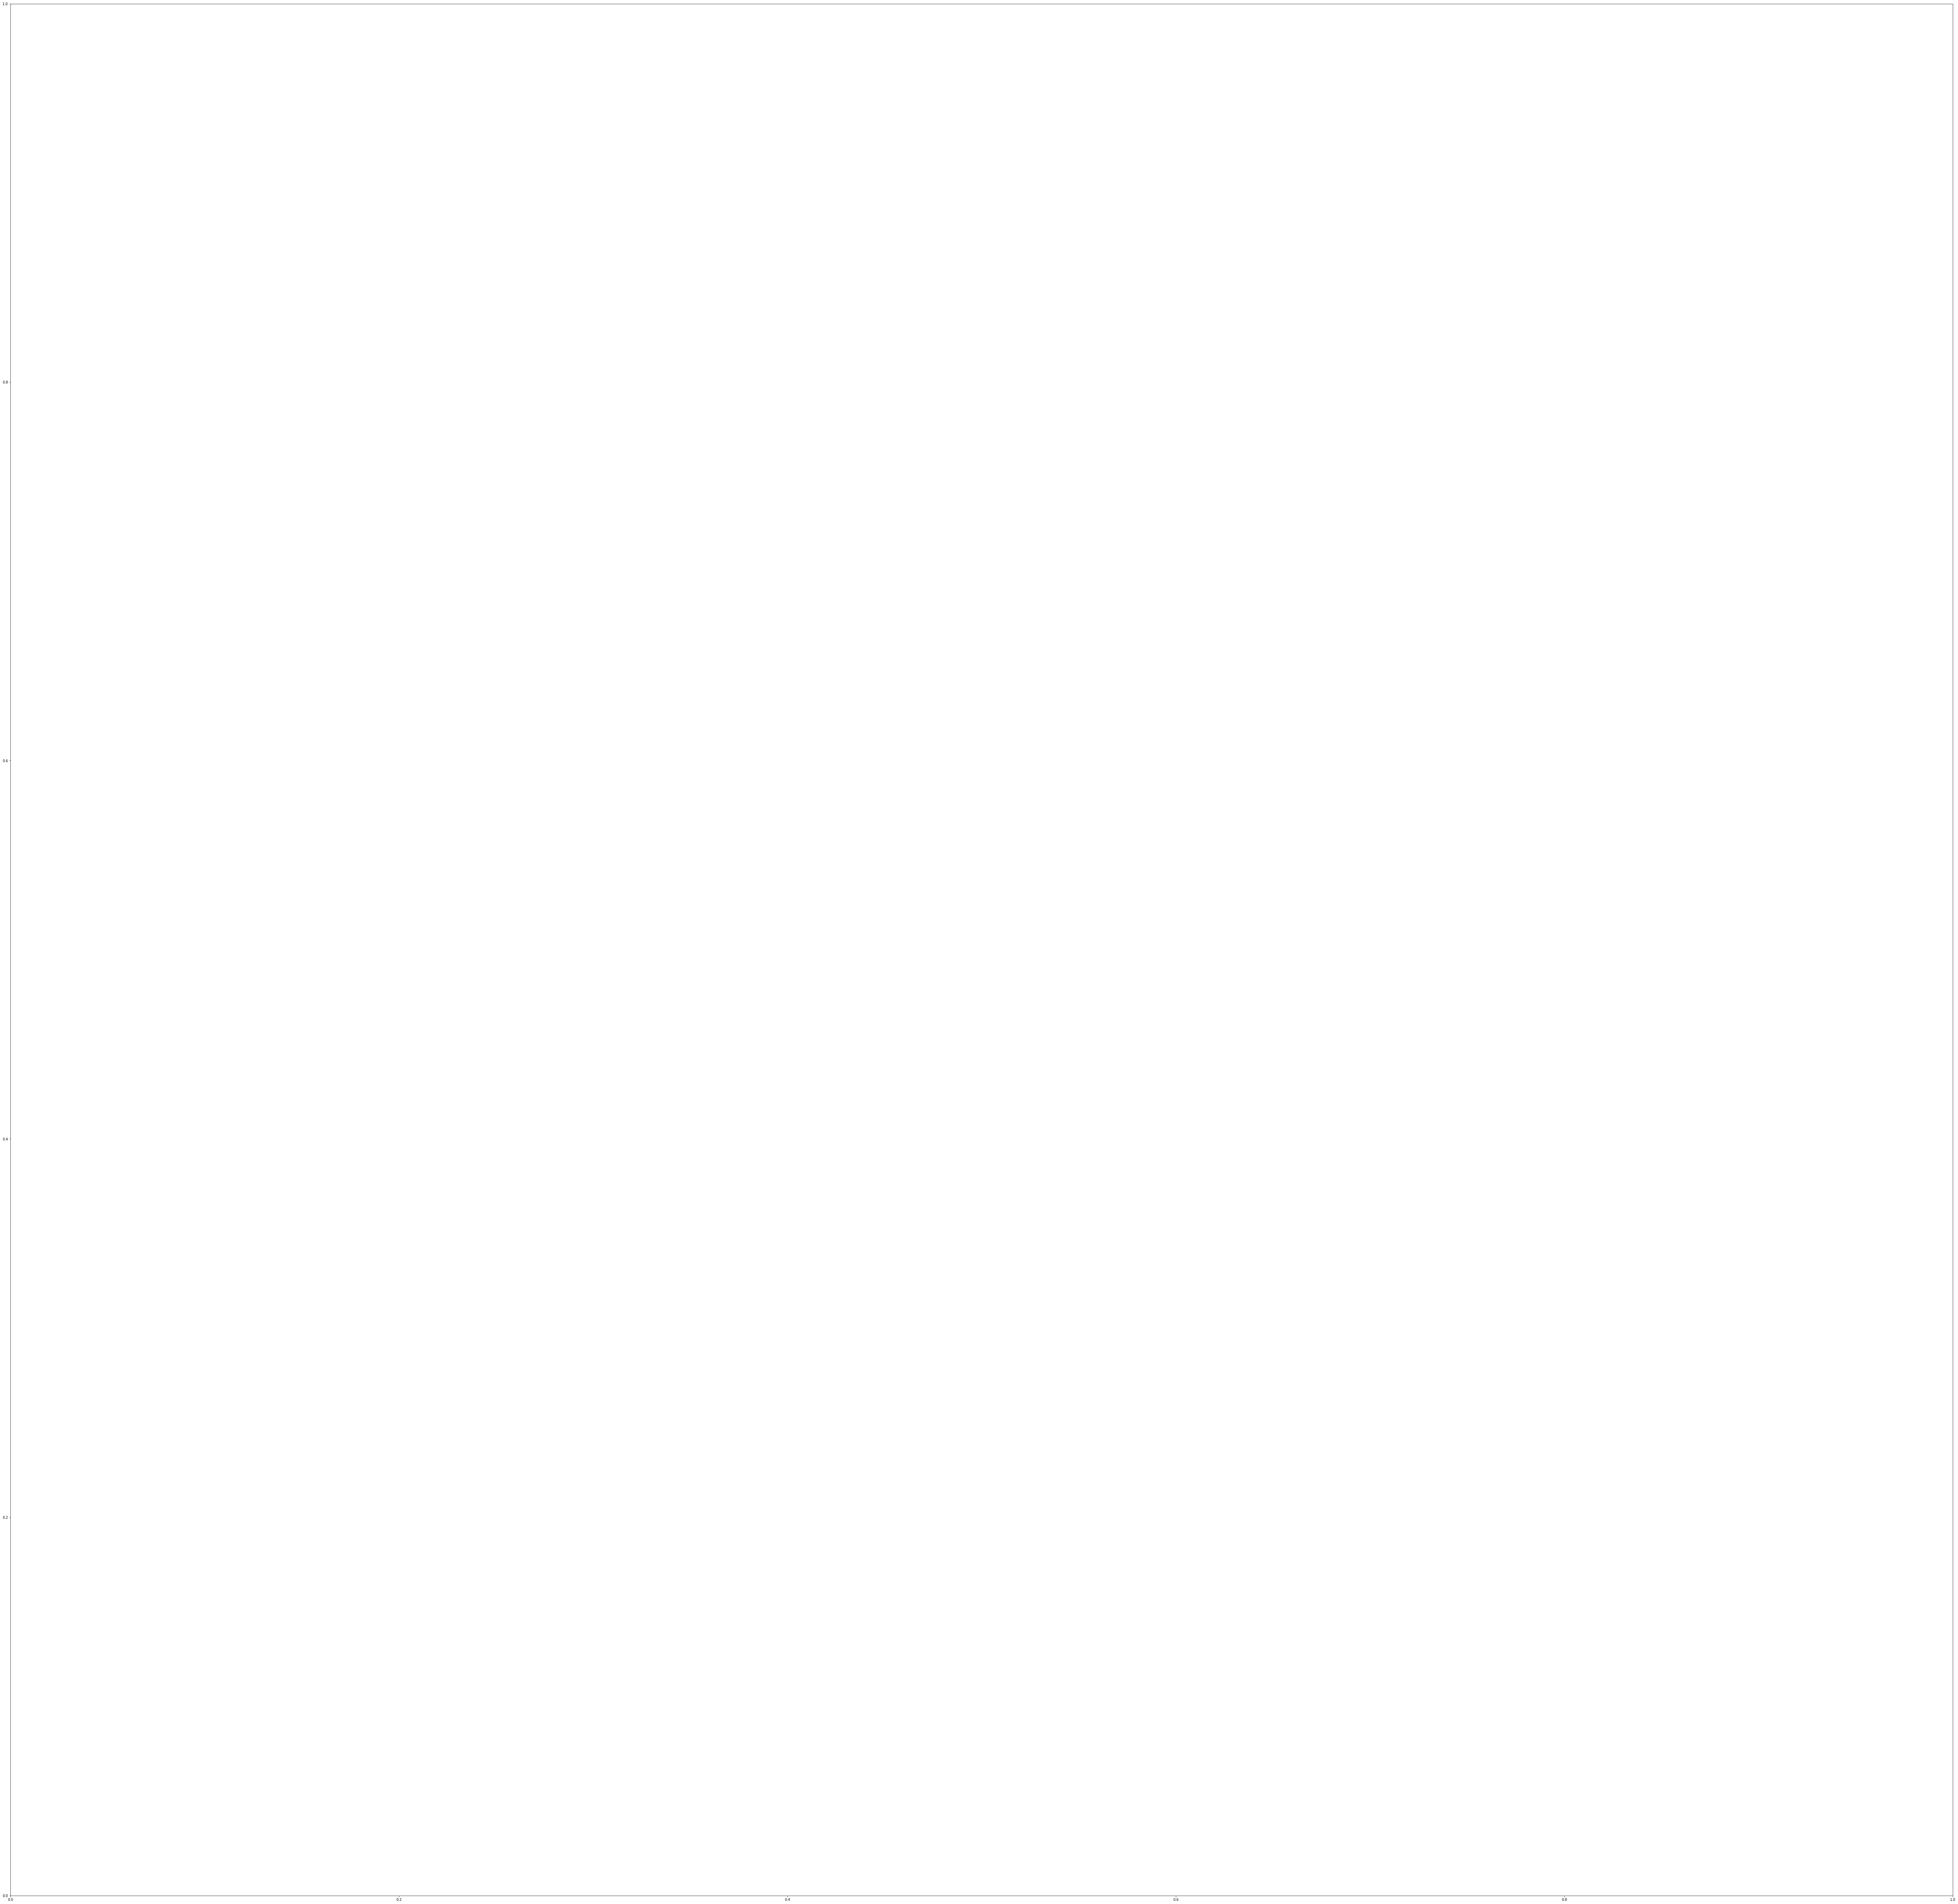

In [ ]:
df=pd.read_csv("iris.csv")
# print(df)
fig, ax = plt.subplots(figsize=(100,100))
# sns.heatmap(df, annot=True, linewidths=.5, ax=ax)
#Dropping non predictive field 
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(X)
print(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=101)


In [ ]:
# Naive Bayes Classfier

# Using GaussianNB
gaussian_clf = GaussianNB()
gaussian_clf.fit(X_train,y_train)

# Applying 10 fold cross validation
gaussian_accuracy = cross_val_score(gaussian_clf,X_test, y_test).mean()
gaussian_precision= cross_val_score(gaussian_clf,X_test, y_test, cv=10, scoring='precision_macro').mean()
gaussian_recall = cross_val_score(gaussian_clf, X_test, y_test, cv=10, scoring='recall_macro').mean()

print("Accuracy for gaussian :", gaussian_accuracy)
print("Recall for gaussian:", gaussian_recall)
print("Precision for gaussian:", gaussian_precision)
predictions = gaussian_clf.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

Accuracy for gaussian : 1.0
Recall for gaussian: 1.0
Precision for gaussian: 1.0
[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
# SVM
linearsvmclf = svm.SVC(kernel='linear', C =1.0)
linearsvmclf.fit(X_train,y_train)


accuracy_svm = cross_val_score(linearsvmclf, X_test, y_test, cv=10, scoring='accuracy').mean()
precision_svm = cross_val_score(linearsvmclf, X_test, y_test, cv=10, scoring='precision_macro').mean()
recall_svm = cross_val_score(linearsvmclf, X_test, y_test, cv=10, scoring='recall_macro').mean()
print ('Accuracy for LinearSVC is', accuracy_svm)
print ('Precision for LinearSVC is', precision_svm)
print ('Recall for LinearSVC is', recall_svm)
predictions = linearsvmclf.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


Accuracy for LinearSVC is 0.9666666666666666
Precision for LinearSVC is 0.95
Recall for LinearSVC is 0.9666666666666666
[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
# Random Forest
rfc =RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

accuracy_rf = cross_val_score(rfc, X_test, y_test, cv=10, scoring='accuracy').mean()
precision_rf = cross_val_score(rfc, X_test, y_test, cv=10, scoring='precision_micro').mean()
recall_rf = cross_val_score(rfc, X_test, y_test, cv=10, scoring='recall_micro').mean()
print ('Accuracy for LinearSVC is', accuracy_rf)
print ('Precision for LinearSVC is', precision_rf)
print ('Recall for LinearSVC is', recall_rf)
predictions = rfc.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
# Logistic Regression 
LR = LogisticRegression()
accuracy_LR = cross_val_score(LR, X_test, y_test).mean()
precision_rf = cross_val_score(LR, X_test, y_test,  scoring='precision_macro').mean()
recall_rf = cross_val_score(rfc, X_test, y_test,scoring='recall_macro').mean()


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy for LinearSVC is 1.0
Precision for LinearSVC is 1.0
Recall for LinearSVC is 1.0
[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
